<a href="https://colab.research.google.com/github/Meghashyamt/Heart-Disease/blob/master/Heart_Disease_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Data to Improve Process


**Data Description**

**age:** The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

In [0]:
#!git clone https://github.com/Humeraafroz/Heart-Disease

# Importing Libraries

In [0]:
#Importing Libraries

import seaborn as sb
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd


In [267]:
#data = pd.read_csv("C:\\Users\\HP\\Downloads\\Heart-Disease-master\\Heart-Disease-master\\heart.csv")
data=pd.read_csv("heart_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [268]:
data.shape

(1025, 14)

In [269]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

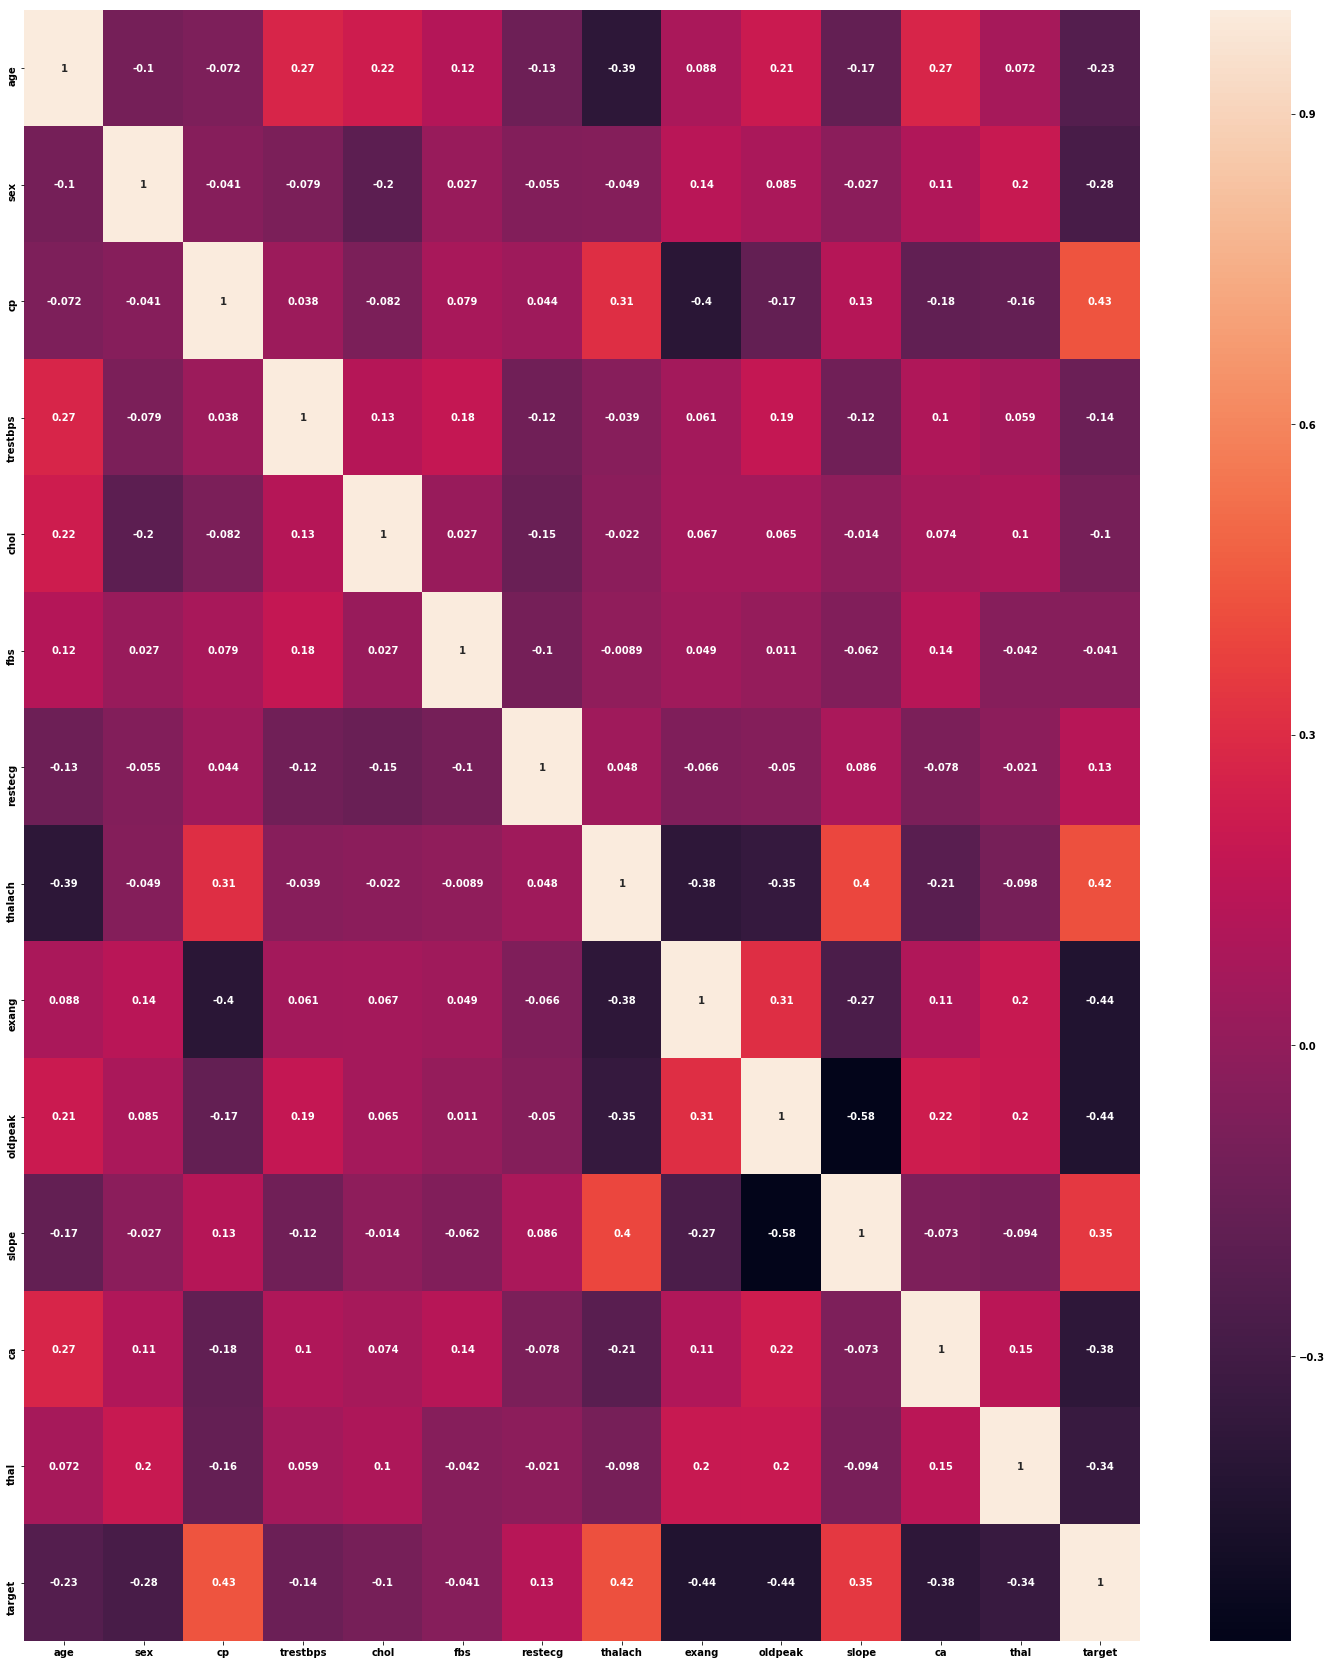

In [270]:
plt.figure(figsize=(25, 30))
ax = sb.heatmap(data.corr(), annot=True)

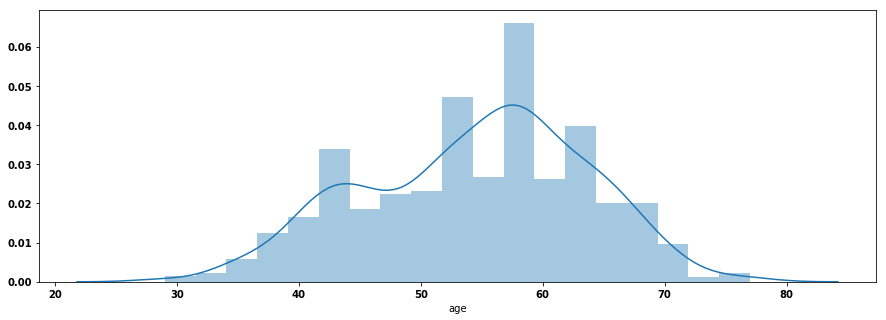

In [271]:
sb.distplot(data['age'])

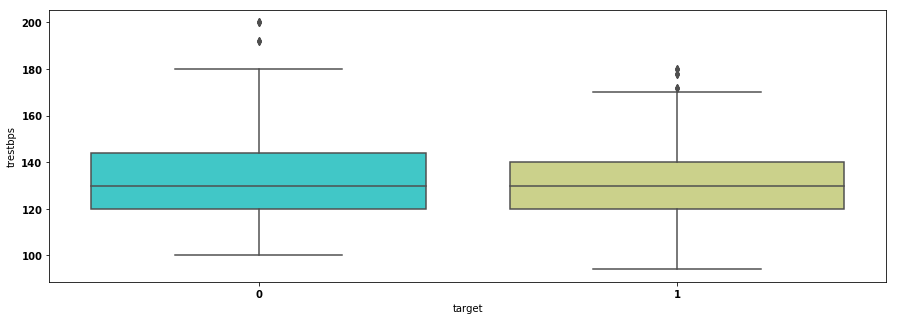

In [272]:
sb.boxplot(x="target", y="trestbps", data=data,palette='rainbow')

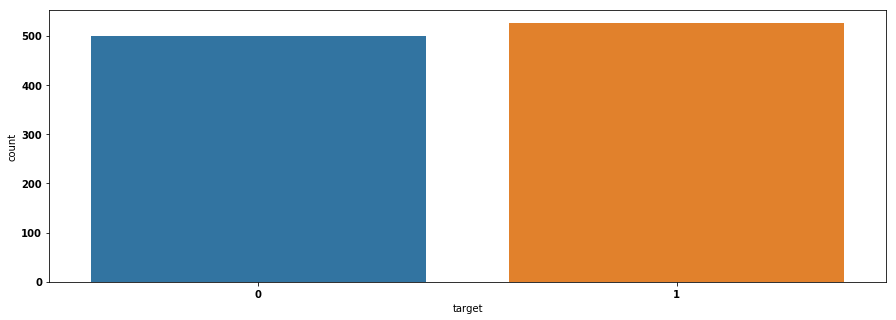

In [273]:
sb.countplot(data.target)

# Exploratory Data Analysis

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X= data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [0]:
y = y.apply(lambda x: 1 if x >= 1 else 0)

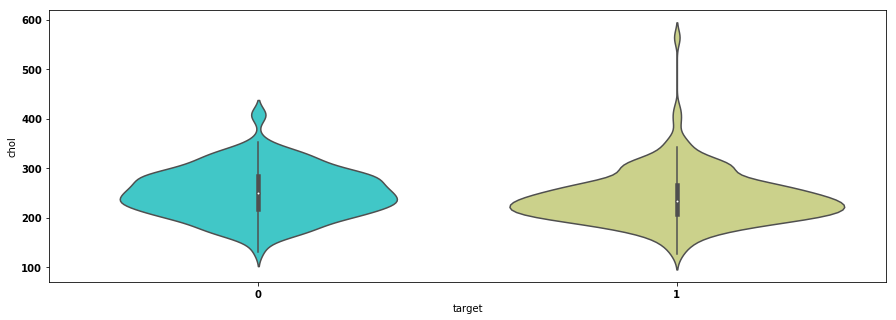

In [277]:
sb.violinplot(x="target", y="chol", data=data,palette='rainbow')

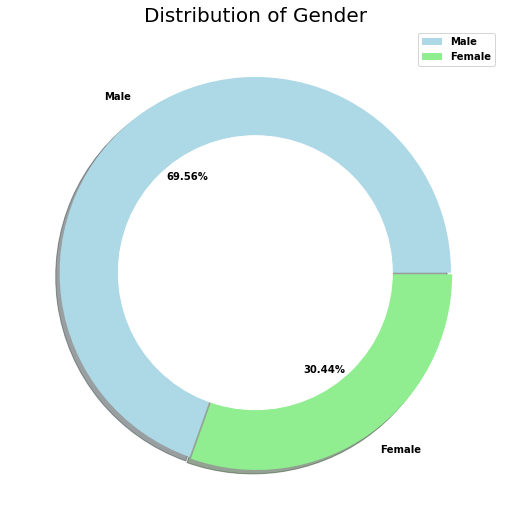

In [278]:
size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

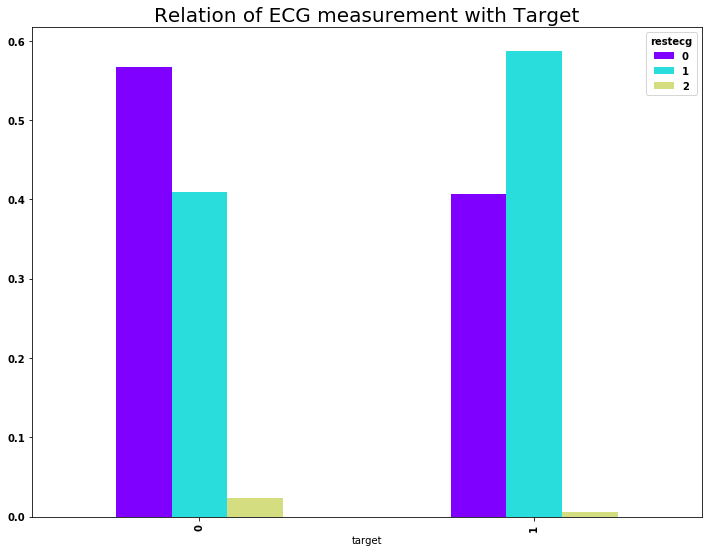

In [279]:
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

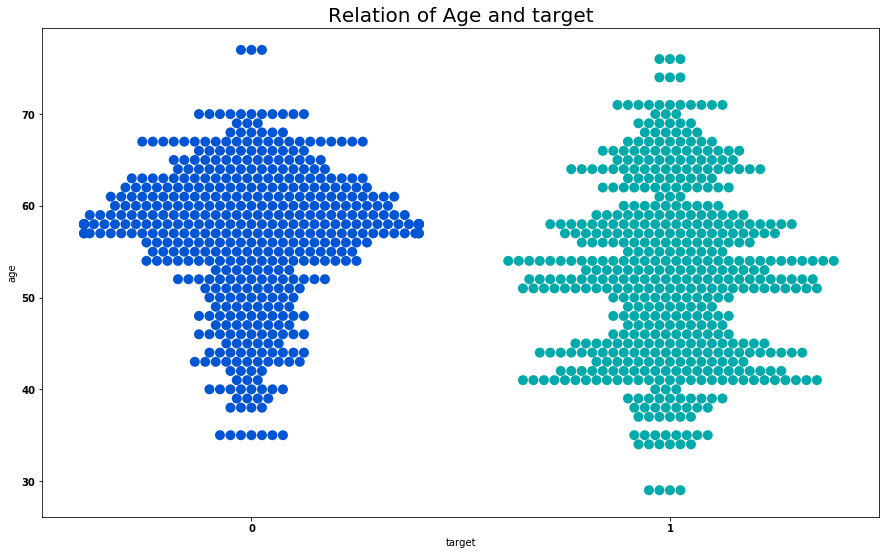

In [280]:
plt.rcParams['figure.figsize'] = (15, 9)
sb.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

In [0]:
heart_health=[]
for k in data['target']:
    if k == 0:
        heart_health.append('Healthy Heart')
    elif k == 1:
        heart_health.append('Heart Disease')

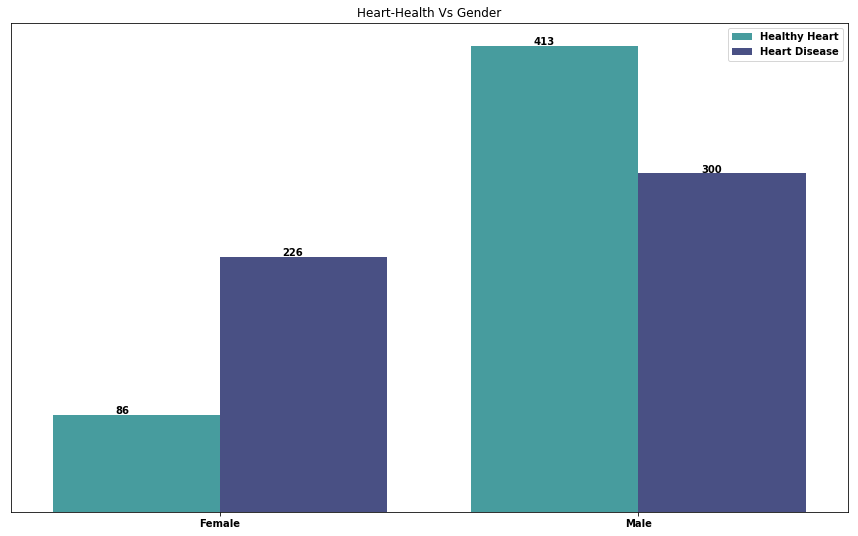

In [282]:
ax = sb.countplot(x='sex',hue=heart_health,data=data,palette='mako_r')

plt.title("Heart-Health Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
ax.set_xticklabels(['Female','Male']);

In [283]:
f = ((data['sex'] == 0) & (data['target'] == 1)).sum()
fd =  (data['target'] == 1).sum()
print('Percent of Female having heart disease : {:.2f}%'.format(f/fd * 100))

m = ((data['sex'] == 1) & (data['target'] == 1)).sum()
md =  (data['target'] == 1).sum()
print('Percent of Male having heart disease : {:.2f}%'.format(m/md * 100))

Percent of Female having heart disease : 42.97%
Percent of Male having heart disease : 57.03%


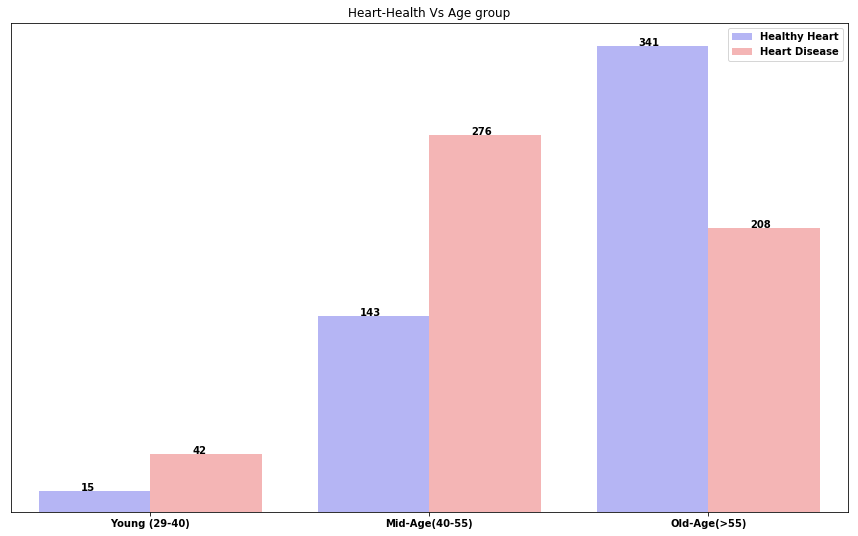

In [284]:
age_group=[]
for k in data['age']:
    if (k >=29) & (k<40):
        age_group.append(0)
    elif (k >=40)&(k<55):
        age_group.append(1)
    else:
        age_group.append(2)
data['Age-Group'] = age_group
plt.title("Heart-Health Vs Age group")
ax = sb.countplot(x=age_group,hue=heart_health,palette='bwr')

plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))
    
ax.set_xticklabels(['Young (29-40)','Mid-Age(40-55)','Old-Age(>55)']);

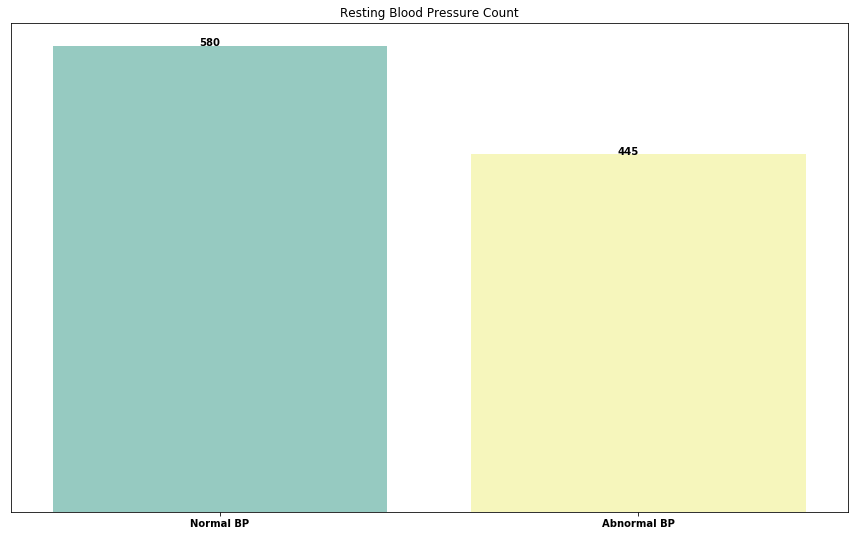

In [285]:
bp=[]
for k in data['trestbps']:
    if (k > 130):
        bp.append(1) #high bp
    else:
        bp.append(0) #normal

ax = sb.countplot(x=bp,palette='Set3')

plt.title("Resting Blood Pressure Count")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
    
ax.set_xticklabels(["Normal BP","Abnormal BP"]);

In [286]:
correlation = data.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age-Group
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324,0.868410
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501,-0.074970
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854,-0.136797
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772,0.283034
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966,0.219654
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164,0.111938
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468,-0.125102
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895,-0.354800
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029,0.121673
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441,0.231102


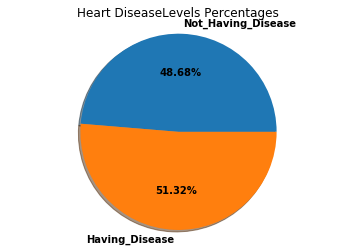

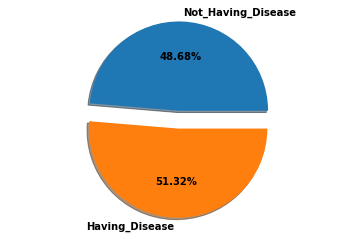

In [287]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import rc
%matplotlib inline
Not_Having_Disease = len(data[data.target == 0])
Having_Disease =len(data[data.target == 1])+len(data[data.target == 2])+\
len(data[data.target == 3])+len(data[data.target == 4])
rc('font', weight='bold')
labels = ['Not_Having_Disease', 'Having_Disease']
values = [Not_Having_Disease, Having_Disease]
explode = (0.1, 0.1)

fig_Disease_Level_percentage, ax1 = plt.subplots()
plt.title('Heart Disease Levels Percentages\n\n')
ax1.pie(values,labels=labels, autopct='%1.2f%%',shadow=True)
ax1.axis('equal')
plt.title('Heart DiseaseLevels Percentages')
fig_Disease_Level_percentage, ax = plt.subplots()
ax.pie(values,explode=explode ,labels=labels, autopct='%1.2f%%',shadow=True)
ax.axis('equal')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.30, random_state=30)

In [0]:
stdScalaer=StandardScaler()
X_train=stdScalaer.fit_transform(X_train)
X_test=stdScalaer.fit_transform(X_test)

# Logistic Regression

In [0]:
model_lr=LogisticRegression(penalty='l1',C=1.0)

In [291]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict_lr=model_lr.predict(X_test)

In [293]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
accuracy_score(y_test, predict_lr)

0.8506493506493507

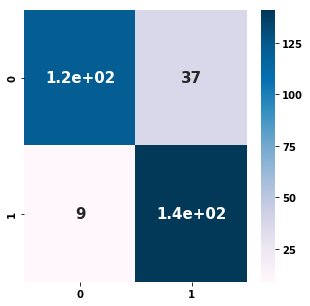

In [294]:

cm = confusion_matrix(y_test, predict_lr)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [295]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.7658227848101266
Specificity :  0.94


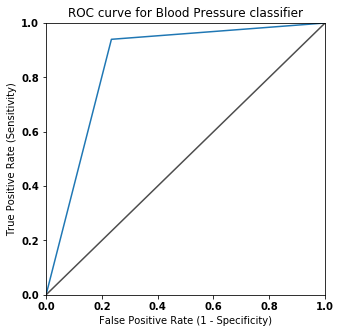

In [296]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_lr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [297]:
#Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
h_logmodel = GridSearchCV(model_lr, hyperparameters, cv=5, verbose=0)
best_logmodel=h_logmodel.fit(X,y)
print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 6, min_samples_leaf= 8)

In [300]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predict_dt=model_dt.predict(X_test)

In [302]:
accuracy_score(y_test, predict_dt)

0.8636363636363636

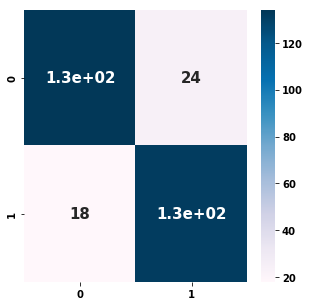

In [303]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_dt)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [304]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.8481012658227848
Specificity :  0.88


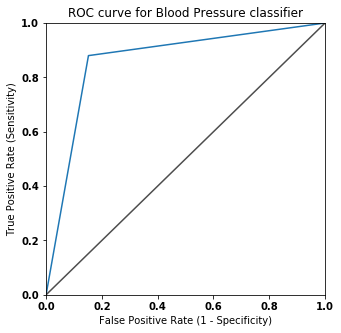

In [305]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_dt)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [306]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.9776847977684798


# Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state = 1, max_depth = 15,     n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)

In [308]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
predict_rf=model_rf.predict(X_test)

In [310]:
accuracy_score(y_test, predict_dt)

0.8636363636363636

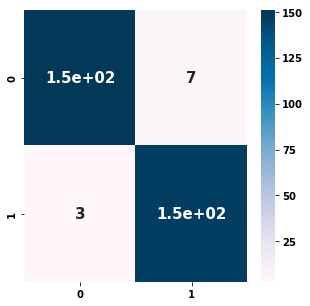

In [311]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [312]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.9556962025316456
Specificity :  0.98


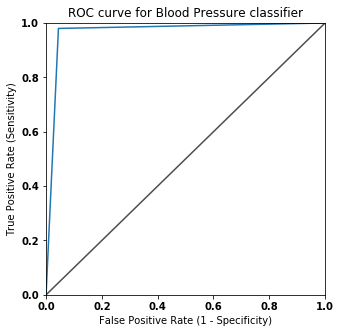

In [313]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_rf)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [0]:
#n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#            min_samples_split = min_samples_split, 
  #        min_samples_leaf = min_samples_leaf)

#gridF = GridSearchCV(model_rf, hyperF, cv = 3, verbose = 1, 
#                n_jobs = -1)
#bestF = gridF.fit(X_train, y_train) '''

# Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA
model_p=PCA()

In [316]:
model_p.fit(X_train,y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [317]:
model_p.components_

array([[ 3.15463690e-01,  5.60278238e-02, -2.70133026e-01,
         1.71307500e-01,  1.62670037e-01,  7.77217271e-02,
        -1.45427073e-01, -4.10589596e-01,  3.54832494e-01,
         4.23340736e-01, -3.74742381e-01,  2.86226898e-01,
         2.12859595e-01],
       [ 3.95240650e-01, -3.11429323e-01,  3.34842082e-01,
         4.51411924e-01,  3.14505068e-01,  3.35832290e-01,
        -2.62408414e-01,  1.10954641e-01, -3.05202911e-01,
        -7.98768606e-02,  7.03409519e-02,  1.19166793e-01,
        -1.39144114e-01],
       [ 1.34138093e-03, -2.37140499e-01, -3.83761369e-01,
        -7.68169451e-02,  5.68398396e-01, -3.87646452e-01,
        -9.16119292e-02,  9.38155944e-02,  4.80950068e-02,
        -2.27670737e-01,  3.71890812e-01,  1.43716544e-01,
         2.94862711e-01],
       [ 1.41282495e-01, -6.26390037e-01, -9.41204448e-02,
        -2.25282079e-01,  3.43382958e-02, -2.26680739e-01,
         1.34252595e-01, -3.16324925e-01, -5.06635120e-03,
         3.31544143e-02, -2.05758290e

In [0]:
component = pd.DataFrame(model_p.components_)

In [319]:
component

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.315464,0.056028,-0.270133,0.171307,0.162670,0.077722,-0.145427,-0.410590,0.354832,0.423341,-0.374742,0.286227,0.212860
1,0.395241,-0.311429,0.334842,0.451412,0.314505,0.335832,-0.262408,0.110955,-0.305203,-0.079877,0.070341,0.119167,-0.139144
2,0.001341,-0.237140,-0.383761,-0.076817,0.568398,-0.387646,-0.091612,0.093816,0.048095,-0.227671,0.371891,0.143717,0.294863
3,0.141282,-0.626390,-0.094120,-0.225282,0.034338,-0.226681,0.134253,-0.316325,-0.005066,0.033154,-0.205758,-0.283212,-0.483472
4,-0.252926,-0.180486,0.259362,0.323117,0.192116,-0.295623,0.156426,0.286788,-0.014271,0.367977,-0.319252,-0.376387,0.348658
5,0.250267,-0.113712,0.143292,-0.003900,-0.092788,-0.030879,0.789203,-0.130418,-0.219268,0.039309,0.128302,0.355648,0.248804
6,-0.155833,-0.194985,-0.241324,0.196733,0.100920,0.606724,0.341489,0.048671,0.456320,-0.174719,0.125908,-0.293900,0.049890
7,-0.359406,-0.183494,-0.009391,-0.481609,0.281770,0.366099,0.012264,0.275352,-0.161649,0.226439,-0.283926,0.392380,-0.061232
8,0.301119,0.143548,0.320320,-0.513048,0.255729,0.191686,-0.060459,-0.214762,-0.036931,-0.171021,-0.095818,-0.412176,0.401618
9,0.027444,0.497271,0.175104,0.033588,0.561113,-0.116855,0.299003,-0.000544,0.168652,0.103464,0.055506,-0.029283,-0.509103


In [0]:
value=model_p.explained_variance_ratio_

In [321]:
value

array([0.21481932, 0.12391082, 0.09408249, 0.09002388, 0.07796942,
       0.07432124, 0.06656572, 0.05711361, 0.05270271, 0.04811034,
       0.04058281, 0.03119552, 0.02860212])

In [322]:
value.sum()

1.0

# K Nearest Neighbours

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model_knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [324]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
predict_knn=model_knn.predict(X_test)

In [326]:
accuracy_score(y_test, predict_knn)

0.8701298701298701

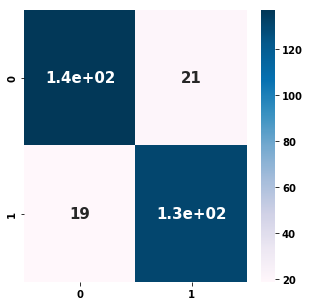

In [327]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [328]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.8670886075949367
Specificity :  0.8733333333333333


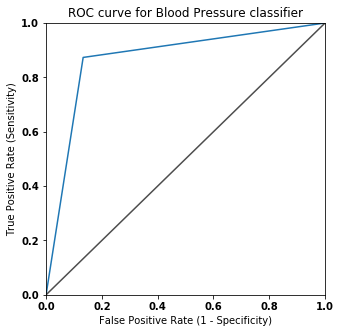

In [329]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_knn)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [330]:
myList = list(range(1,50))
from sklearn.model_selection import cross_val_score
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(cv_scores)

[0.9818460994276158, 0.9093272343344696, 0.8370208695092931, 0.8508717066478017, 0.8523393787381826, 0.8411108967350526, 0.835612954745214, 0.8285707012240872, 0.8300193474392781, 0.8203140073316613, 0.825870098827363, 0.8313881385726842, 0.8327775634017194, 0.8355363153043068, 0.8299611979334148, 0.8243464209917036, 0.8299601260531224, 0.8328161510922459, 0.8412467575621155, 0.8370599931399662, 0.8398182091024073, 0.8384478101485626, 0.8356124188050679, 0.8384684438441916, 0.8356901301262676]


In [331]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [332]:
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [0]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')


In [334]:
grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=49, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [335]:
grid.score


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=49, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)>

In [336]:
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9818688981868898
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


# Support Vector Machine

In [0]:
from sklearn.svm import SVC
model_svm= SVC(C=100, kernel='rbf', gamma=0.05)

In [338]:
model_svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predict_svm =model_svm.predict(X_test)

In [340]:
accuracy_score(y_test, predict_svm)

0.9577922077922078

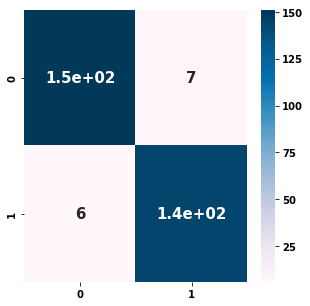

In [341]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_svm)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [342]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.9556962025316456
Specificity :  0.96


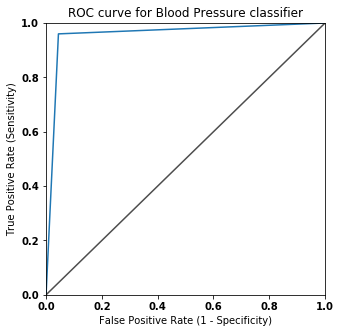

In [343]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_svm)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
#Grid Search  to find the value from kernel , c , gamma
#parameters=[{'kernel':['linear'], 'C':[1,10,100,1000,10000]},
 #          {'kernel':['rbf'],'gamma':[0.5, 0.1, 0.05,0.07,0.08], 'C':[1,10,100,1000,10000]}]
#grid_model_svc= GridSearchCV(SVC(), parameters)
#grid_model_svc.fit(X_train, y_train)
#grid_model_svc.best_score_

In [0]:
#grid_model_svc.best_params_

# XGBoost Classifier

In [0]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=5,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [347]:
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
predict_xg= model_xg.predict(X_test)

In [349]:
accuracy_score(y_test, predict_xg)

0.948051948051948

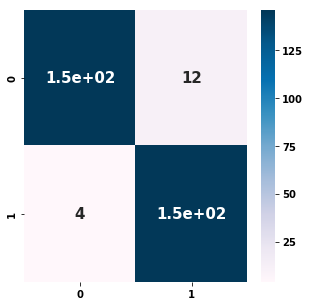

In [350]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_xg)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [351]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.9240506329113924
Specificity :  0.9733333333333334


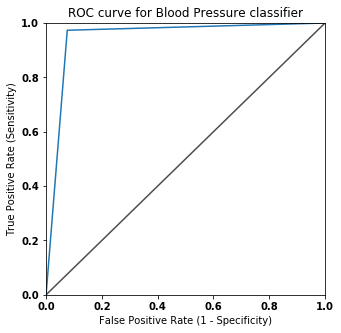

In [352]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_xg)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [353]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.score, gsearch1.best_params_, gsearch1.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=5, min_child_weight=1,
                                      missing=None, n_estimators=140, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'max_depth': range(3, 10, 2),
                          'min_child_weight': range(1, 6, 2)},
     

In [354]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.score, gsearch3.best_params_, gsearch3.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=4, min_child_weight=6,
                                      missing=None, n_estimators=140, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
              pre_dispatch='2*n_jobs', refit=True, return_tra

In [355]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.score, gsearch4.best_params_, gsearch4.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=4, min_child_weight=6,
                                      missing=None, n_estimators=177, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                          'subsample': [0.6, 0.7, 0.8, 0

In [356]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.score, gsearch6.best_params_, gsearch6.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0.1,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=4, min_child_weight=6,
                                      missing=None, n_estimators=177, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=4,
              param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
              pre_dispatch='2*n_jobs', refit=True, ret

# Ada Boost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

In [0]:
model_abc= AdaBoostClassifier(n_estimators=100,
                         learning_rate=1, base_estimator=model_rf)

In [359]:
model_abc.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=15,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=500,
                          

In [0]:
predict_abc = model_abc.predict(X_test)


In [361]:
accuracy_score(y_test, predict_abc)

0.9772727272727273

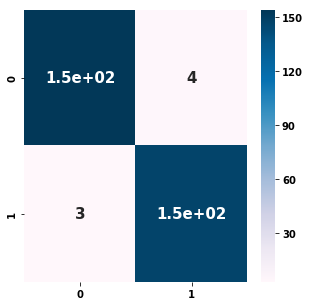

In [362]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, predict_abc)
plt.rcParams['figure.figsize'] = (5, 5)
sb.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

In [363]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.9746835443037974
Specificity :  0.98


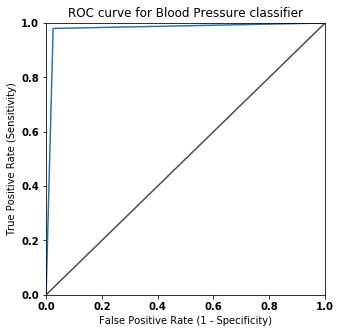

In [364]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_abc)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Blood Pressure classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [365]:
# Accuracy Logistic Regression
lr_accuracy=accuracy_score(y_test, predict_lr)
lr_accuracy


0.8506493506493507

In [366]:
# Accuracy Decision Tree
dt_accuracy=accuracy_score(y_test, predict_dt)
dt_accuracy

0.8636363636363636

In [367]:
# Accuracy Random Forest
rf_accuracy=accuracy_score(y_test, predict_rf)
rf_accuracy

0.9675324675324676

In [368]:
# Accuracy  XGBoost
xg_accuracy=accuracy_score(y_test, predict_xg)
xg_accuracy

0.948051948051948

In [369]:
# Accuracy Ada Boost
ada_accuracy=accuracy_score(y_test, predict_abc)
ada_accuracy

0.9772727272727273

In [370]:
# Accuracy KNN
knn_accuracy=accuracy_score(y_test, predict_knn)
knn_accuracy

0.8701298701298701

In [371]:
# Accuracy  SVM
svm_accuracy=accuracy_score(y_test, predict_svm)
svm_accuracy

0.9577922077922078

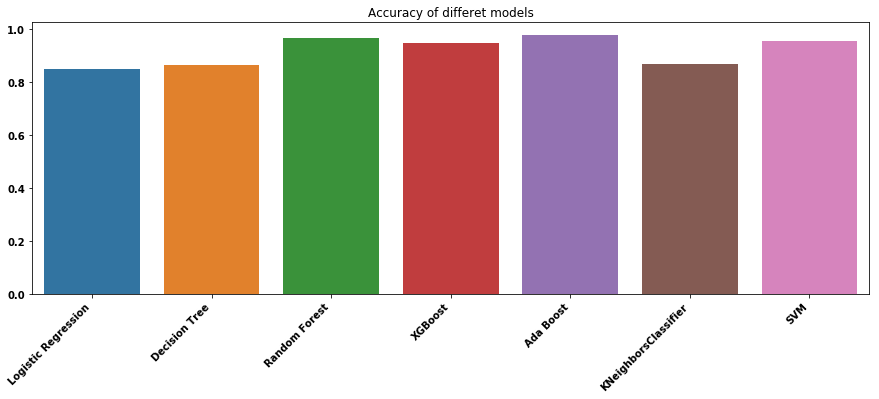

In [372]:
models = ['Logistic Regression','Decision Tree','Random Forest','XGBoost','Ada Boost','KNeighborsClassifier','SVM']
accuracy = [lr_accuracy,dt_accuracy,rf_accuracy,xg_accuracy,ada_accuracy,knn_accuracy,svm_accuracy]

ax = sb.barplot(models,accuracy)

plt.title("Accuracy of differet models")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');